In [10]:
!pip install yfinance

In [11]:
import yfinance as yf

In [60]:
import datetime
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost
import lightgbm

In [13]:
startdate=datetime.datetime(2017,1,1)
enddate=datetime.datetime(2021,4,15)

In [14]:
import pandas as pd
stockprice=pd.DataFrame()

In [15]:
df=yf.download('APA',start=startdate,end=enddate)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,64.709999,64.919998,62.080002,63.779999,55.658871,4816800
2017-01-04,63.869999,64.209999,63.080002,63.590000,55.493076,2620100
2017-01-05,63.799999,64.110001,62.810001,63.250000,55.196373,2531900
2017-01-06,63.520000,63.750000,62.560001,63.119999,55.082924,2936700
2017-01-09,62.730000,62.900002,62.110001,62.360001,54.419693,2334800


In [16]:
df.shape

(1077, 6)

In [17]:
import numpy as np

import matplotlib.pyplot as plt

In [18]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 22.1 MB/s eta 0:00:00


In [19]:
import pmdarima as pm

Text(0.5, 0, 'closing price')

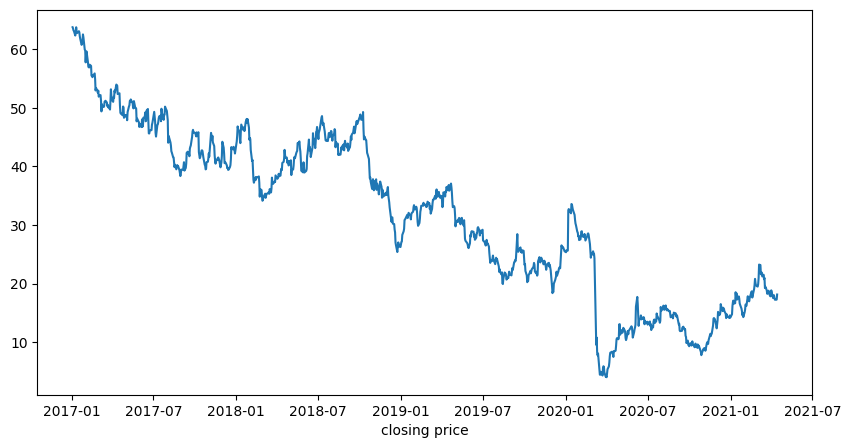

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label='Original Data')
plt.xlabel('Date')
plt.xlabel('closing price')

In [21]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [22]:
adf_result = sm.tsa.adfuller(df['Close'])
adf_statistic = adf_result[0]
p_value = adf_result[1]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')

# Check if the data is stationary
if p_value < 0.05:
    print('The data is stationary.')
else:
    print('The data is non-stationary.')

ADF Statistic: -2.0730421129098304
p-value: 0.2554917271347623
The data is non-stationary.


In [23]:
df['Stationary'] = df['Close'].diff().dropna()

In [24]:
model = pm.auto_arima(df['Close'], trace=True, error_action='ignore', suppress_warnings=True)
model.fit(df['Close'])




Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2953.033, Time=2.04 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2953.506, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2952.743, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2952.856, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2953.637, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2954.297, Time=0.24 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2953.113, Time=0.68 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2954.878, Time=0.90 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2952.661, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=2954.134, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2952.570, Time=0.50 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2952.793, Time=0.26 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2954.344, Time=0.86 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2954.341, Time=0.66 sec
 ARIMA(0,1,2)(0,0,0)[0]          

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [25]:
forecast = model.predict(n_periods=30)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


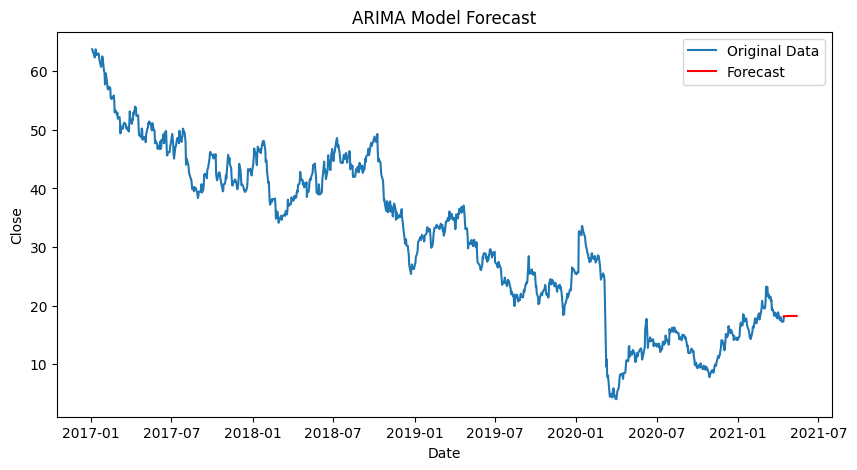

In [26]:
plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label='Original Data')
plt.plot(pd.date_range(start=df.index[-1], periods=30, freq='D'), forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('ARIMA Model Forecast')
plt.legend()
plt.show()

In [29]:
from google.colab import files


uploaded = files.upload()

Saving News_sentiment_Jan2017_to_Apr2021.csv to News_sentiment_Jan2017_to_Apr2021.csv


In [30]:
ndf = pd.read_csv("News_sentiment_Jan2017_to_Apr2021.csv")

In [31]:
ndf.head()

,Date,Title,URL,sentiment,confidence,Unnamed: 5
0,05/01/17,Eliminating shadow economy to have positive im...,http://economictimes.indiatimes.com/news/econo...,POSITIVE,0.996185,NaN
1,05/01/17,Two Chinese companies hit roadblock with India...,http://economictimes.indiatimes.com/news/econo...,NEGATIVE,-0.955493,NaN
2,05/01/17,SoftBank India Vision gets new $100,http://economictimes.indiatimes.com/small-biz/...,POSITIVE,0.595612,NaN
3,05/01/17,Nissan halts joint development of luxury cars ...,http://economictimes.indiatimes.com/news/inter...,NEGATIVE,-0.996672,NaN
4,05/01/17,Despite challenges Rajasthan continues to prog...,http://economictimes.indiatimes.com/news/polit...,POSITIVE,0.997388,NaN


In [32]:
ndf=ndf.drop(['URL','sentiment','confidence','Unnamed: 5'],axis=1)

In [33]:
ndf.head()

,Date,Title
0,05/01/17,Eliminating shadow economy to have positive im...
1,05/01/17,Two Chinese companies hit roadblock with India...
2,05/01/17,SoftBank India Vision gets new $100
3,05/01/17,Nissan halts joint development of luxury cars ...
4,05/01/17,Despite challenges Rajasthan continues to prog...


In [41]:
ndf.shape

(200500, 4)

In [39]:
from textblob import TextBlob
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

In [40]:
ndf['Subjectivity'] = ndf['Title'].apply(getSubjectivity)
ndf['Polarity'] = ndf['Title'].apply(getPolarity)
ndf

,Date,Title,Subjectivity,Polarity
0,05/01/17,Eliminating shadow economy to have positive im...,0.545455,0.227273
1,05/01/17,Two Chinese companies hit roadblock with India...,0.000000,0.000000
2,05/01/17,SoftBank India Vision gets new $100,0.454545,0.136364
3,05/01/17,Nissan halts joint development of luxury cars ...,0.000000,0.000000
4,05/01/17,Despite challenges Rajasthan continues to prog...,0.000000,0.000000
...,...,...,...,...
200495,12/04/21,"Realme 8 5G launch date announced , specificat...",0.000000,0.000000
200496,11/04/21,"Bitcoin resurges beyond $60 , 000 over reports...",0.000000,0.000000
200497,11/04/21,FPIs withdraw Rs 929 cr from Indian markets so...,1.000000,0.100000
200498,11/04/21,"Google confirms Pixel 5a 5G is not cancelled ,...",0.000000,0.000000


In [45]:
ndf["Date"] = pd.to_datetime(ndf["Date"], format='%d/%m/%y')

ndf

,Date,Title,Subjectivity,Polarity
0,2017-01-05,Eliminating shadow economy to have positive im...,0.545455,0.227273
1,2017-01-05,Two Chinese companies hit roadblock with India...,0.000000,0.000000
2,2017-01-05,SoftBank India Vision gets new $100,0.454545,0.136364
3,2017-01-05,Nissan halts joint development of luxury cars ...,0.000000,0.000000
4,2017-01-05,Despite challenges Rajasthan continues to prog...,0.000000,0.000000
...,...,...,...,...
200495,2021-04-12,"Realme 8 5G launch date announced , specificat...",0.000000,0.000000
200496,2021-04-11,"Bitcoin resurges beyond $60 , 000 over reports...",0.000000,0.000000
200497,2021-04-11,FPIs withdraw Rs 929 cr from Indian markets so...,1.000000,0.100000
200498,2021-04-11,"Google confirms Pixel 5a 5G is not cancelled ,...",0.000000,0.000000


In [48]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [49]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

In [51]:
ndf['Compound'] = [sia.polarity_scores(v)['compound'] for v in ndf['Title']]
ndf['Negative'] = [sia.polarity_scores(v)['neg'] for v in ndf['Title']]
ndf['Neutral'] = [sia.polarity_scores(v)['neu'] for v in ndf['Title']]
ndf['Positive'] = [sia.polarity_scores(v)['pos'] for v in ndf['Title']]
ndf

,Date,Title,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2017-01-05,Eliminating shadow economy to have positive im...,0.545455,0.227273,0.5574,0.000,0.735,0.265
1,2017-01-05,Two Chinese companies hit roadblock with India...,0.000000,0.000000,0.0000,0.000,1.000,0.000
2,2017-01-05,SoftBank India Vision gets new $100,0.454545,0.136364,0.2500,0.000,0.714,0.286
3,2017-01-05,Nissan halts joint development of luxury cars ...,0.000000,0.000000,0.0000,0.000,1.000,0.000
4,2017-01-05,Despite challenges Rajasthan continues to prog...,0.000000,0.000000,0.3773,0.122,0.599,0.279
...,...,...,...,...,...,...,...,...
200495,2021-04-12,"Realme 8 5G launch date announced , specificat...",0.000000,0.000000,0.0000,0.000,1.000,0.000
200496,2021-04-11,"Bitcoin resurges beyond $60 , 000 over reports...",0.000000,0.000000,-0.1027,0.135,0.865,0.000
200497,2021-04-11,FPIs withdraw Rs 929 cr from Indian markets so...,1.000000,0.100000,0.0000,0.000,1.000,0.000
200498,2021-04-11,"Google confirms Pixel 5a 5G is not cancelled ,...",0.000000,0.000000,0.1877,0.000,0.873,0.127


In [52]:
df_merge = pd.merge(df, ndf, how='inner', on='Date')
df_merge

,Date,Open,High,Low,Close,Adj Close,Volume,Stationary,Title,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2017-01-03,64.709999,64.919998,62.080002,63.779999,55.658871,4816800,NaN,LSE to sell French arm of LCH to Euronext for ...,0.000,0.000,0.0000,0.000,1.000,0.000
1,2017-01-03,64.709999,64.919998,62.080002,63.779999,55.658871,4816800,NaN,US construction spending hits highest level in...,0.000,0.000,0.0000,0.000,1.000,0.000
2,2017-01-03,64.709999,64.919998,62.080002,63.779999,55.658871,4816800,NaN,Argentines declare $97 . 8 bn in tax amnesty,0.000,0.000,0.0000,0.000,1.000,0.000
3,2017-01-03,64.709999,64.919998,62.080002,63.779999,55.658871,4816800,NaN,"Kia , Changan , Beiqi Foton , Daihatsu and oth...",0.375,-0.125,-0.6369,0.259,0.741,0.000
4,2017-01-03,64.709999,64.919998,62.080002,63.779999,55.658871,4816800,NaN,"B for Banks , B for Brittle : Will the Banks B...",0.625,0.500,0.0000,0.000,1.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167488,2021-04-14,17.549999,18.680000,17.490000,18.139999,17.427689,8779600,0.859999,World stocks reach record peaks as US inflatio...,0.000,0.000,-0.4019,0.235,0.672,0.092
167489,2021-04-14,17.549999,18.680000,17.490000,18.139999,17.427689,8779600,0.859999,Tika Utsav : Over 25 lakh people get COVID - 1...,0.000,0.000,0.0000,0.000,1.000,0.000
167490,2021-04-14,17.549999,18.680000,17.490000,18.139999,17.427689,8779600,0.859999,"BSE , NSE closed today on account of Baba Sahe...",0.100,-0.100,0.0000,0.000,1.000,0.000
167491,2021-04-14,17.549999,18.680000,17.490000,18.139999,17.427689,8779600,0.859999,Dont want to arrest economy : Sitharaman say...,0.050,-0.025,0.2057,0.075,0.800,0.125


In [53]:
df_model = df_merge[['Close','Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral', 'Positive']]
df_model

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,63.779999,0.000,0.000,0.0000,0.000,1.000,0.000
1,63.779999,0.000,0.000,0.0000,0.000,1.000,0.000
2,63.779999,0.000,0.000,0.0000,0.000,1.000,0.000
3,63.779999,0.375,-0.125,-0.6369,0.259,0.741,0.000
4,63.779999,0.625,0.500,0.0000,0.000,1.000,0.000
...,...,...,...,...,...,...,...
167488,18.139999,0.000,0.000,-0.4019,0.235,0.672,0.092
167489,18.139999,0.000,0.000,0.0000,0.000,1.000,0.000
167490,18.139999,0.100,-0.100,0.0000,0.000,1.000,0.000
167491,18.139999,0.050,-0.025,0.2057,0.075,0.800,0.125


In [56]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_m = pd.DataFrame(scaler.fit_transform(df_model))
df_m.columns = df_model.columns
df_m.index = df_model.index
df_m.tail()

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
167488,0.236278,0.00,0.5000,0.292871,0.283474,0.635556,0.102222
167489,0.236278,0.00,0.5000,0.502609,0.000000,1.000000,0.000000
167490,0.236278,0.10,0.4500,0.502609,0.000000,1.000000,0.000000
167491,0.236278,0.05,0.4875,0.609957,0.090470,0.777778,0.138889
167492,0.236278,0.00,0.5000,0.314111,0.290712,0.732222,0.000000


In [57]:
X=df_m.drop('Close',axis=1)
X

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.000,0.5000,0.502609,0.000000,1.000000,0.000000
1,0.000,0.5000,0.502609,0.000000,1.000000,0.000000
2,0.000,0.5000,0.502609,0.000000,1.000000,0.000000
3,0.375,0.4375,0.170233,0.312425,0.712222,0.000000
4,0.625,0.7500,0.502609,0.000000,1.000000,0.000000
...,...,...,...,...,...,...
167488,0.000,0.5000,0.292871,0.283474,0.635556,0.102222
167489,0.000,0.5000,0.502609,0.000000,1.000000,0.000000
167490,0.100,0.4500,0.502609,0.000000,1.000000,0.000000
167491,0.050,0.4875,0.609957,0.090470,0.777778,0.138889


In [58]:
Y=df_m['Close']
Y

0         1.000000
1         1.000000
2         1.000000
3         1.000000
4         1.000000
            ...   
167488    0.236278
167489    0.236278
167490    0.236278
167491    0.236278
167492    0.236278
Name: Close, Length: 167493, dtype: float64

In [61]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 0)
x_train.shape

(133994, 6)

In [79]:
x_test.shape

(33499, 6)

**Random forest regression **

In [62]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
prediction=rf.predict(x_test)

In [63]:
print(prediction[:10])
print(y_test[:10])
print('Mean Squared error: ',mean_squared_error(prediction,y_test))

[0.44410885 0.48690389 0.48668688 0.46800621 0.29718697 0.40727151
 0.30888722 0.36045656 0.57331909 0.48690389]
68546     0.667336
42207     0.716533
71334     0.657463
103559    0.334839
129385    0.029116
4355      0.889558
125791    0.341533
109275    0.328481
56347     0.617972
124270    0.400770
Name: Close, dtype: float64
Mean Squared error:  0.05770908627830573


**Decision tree regression**

In [64]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
predictions = dtr.predict(x_test)

In [65]:
print(predictions[:10])
print(y_test[:10])
print('Mean Squared error: ',mean_squared_error(predictions,y_test))

[0.59119811 0.48690326 0.48646439 0.69678716 0.32262383 0.4113433
 0.16482597 0.77342709 0.57078315 0.48690326]
68546     0.667336
42207     0.716533
71334     0.657463
103559    0.334839
129385    0.029116
4355      0.889558
125791    0.341533
109275    0.328481
56347     0.617972
124270    0.400770
Name: Close, dtype: float64
Mean Squared error:  0.07328619274895941


**Ada boost algorithmn**

In [66]:
adb = AdaBoostRegressor()
adb.fit(x_train, y_train)

AdaBoostRegressor()

In [67]:
predictions = adb.predict(x_test)
print(mean_squared_error(predictions, y_test))

0.05536327291826119


**LightGBM**

In [68]:
gbm = lightgbm.LGBMRegressor()
gbm.fit(x_train, y_train)


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015363 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1410
[LightGBM] [Info] Number of data points in the train set: 133994, number of used features: 6
[LightGBM] [Info] Start training from score 0.476024


LGBMRegressor()

In [73]:
predictions_l= gbm.predict(x_test)
print(mean_squared_error(predictions_l, y_test))


0.05409954638681187


**xgboost**

In [70]:
xgb = xgboost.XGBRegressor()
xgb.fit(x_train, y_train)
predictions = xgb.predict(x_test)
print(mean_squared_error(predictions, y_test))

0.0544163285324735


conclusion:

xgboost:  0.0544163285324735

adaboost: 0.05536327291826119

lightgbm: 0.05409954638681187

random forest:  0.05770908627830573

decision tree:  0.07328619274895941
